## Session 3 Task 1: Construct a predictive model for estimating fish weight using simple or multiple linear regression on a dataset containing 7 common fish species sold at fish markets.

In this task, you will perform data visualisation, data preprocessing, implement simple/multiple linear regression, model evaluation, and model comparision. The dataset description is as follows:

Species : species name of fish
Weight  : weight of fish in Gram g
Length1 : vertical length in cm
Length2 : diagonal length in cm
Length3 : cross length in cm
Height  : height in cm
width   : diagonal width in cm

Follow this instructions to implement this task:

Step 1: Import Library packages

In [1]:
# Import library packages
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Step 2: Read the dataset

In [2]:
#Read the dataset from scikit-learn library.
fish = pd.read_csv('Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Data pre-processing

Step 3: generate the correlation matrix using sns.heatmap()

In [3]:
#description of the data in the DataFrame
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<AxesSubplot:>

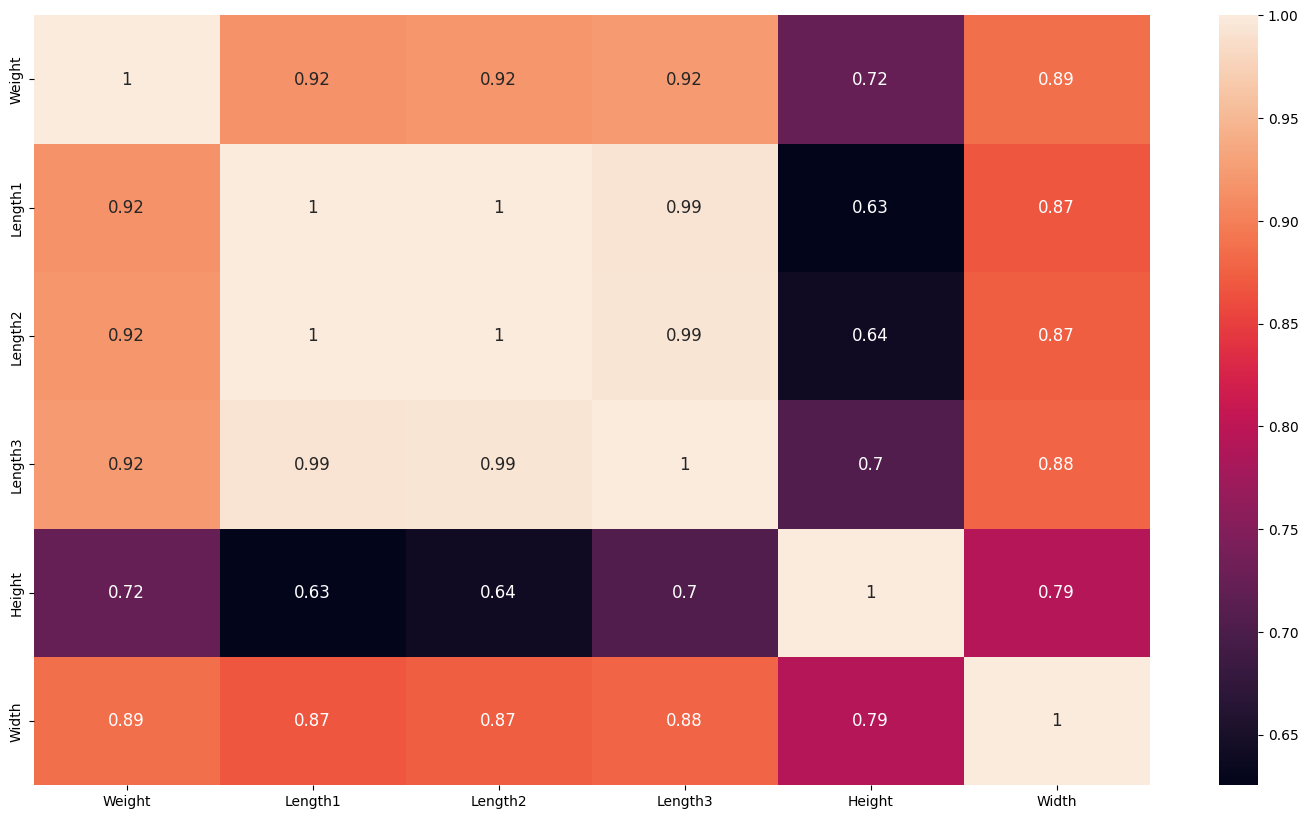

In [4]:
fig , ax = plt.subplots(figsize = (18,10))
corrdat = fish.corr()
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

Step 4: Select the features which have a high correlation with our target variable weight with threshold 0.8 coefficeient value. 

In [5]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df
threshold = 0.8
corr_value = getCorrelatedFeature(corrdat['Weight'],threshold)
corr_value

,corr value
Weight,1.000000
Length1,0.915712
Length2,0.918618
Length3,0.923044
Width,0.886507


In [ ]:
Step 5: Recreate the dataset which contains only high correlation features with target variable weight.

In [6]:
#dataset contains only high correlation features with target variable weight.
CD = fish[corr_value.index]
CD.head()

,Weight,Length1,Length2,Length3,Width
0,242.0,23.2,25.4,30.0,4.0200
1,290.0,24.0,26.3,31.2,4.3056
2,340.0,23.9,26.5,31.1,4.6961
3,363.0,26.3,29.0,33.5,4.4555
4,430.0,26.5,29.0,34.0,5.1340


### Data visualisation

Step 6: Generate the scatter plot to visualise the change in variables. Example: target variable weight with high correlated feature.

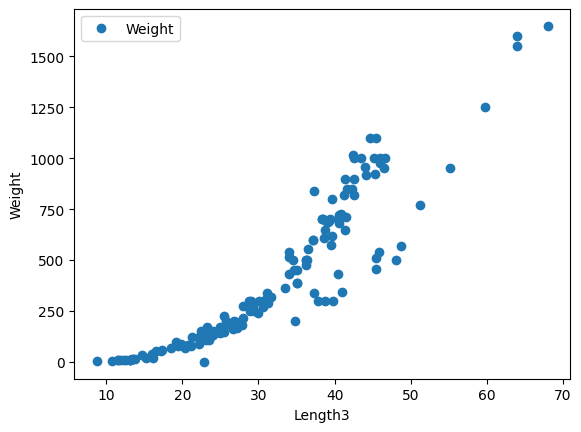

<AxesSubplot:xlabel='Length3', ylabel='Weight'>

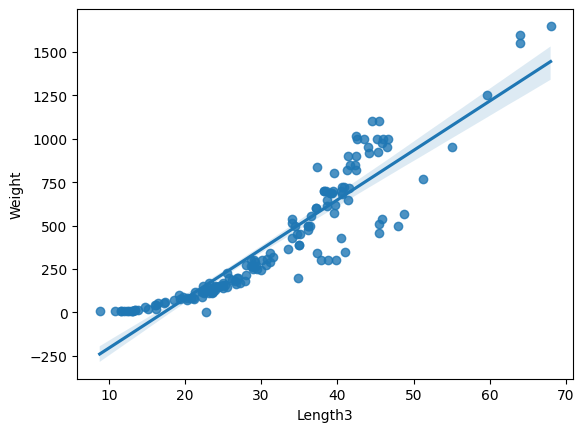

In [8]:
#visualise the change in variables
CD.plot(x='Length3',y='Weight',style='o')
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.show()
sns.regplot(x="Length3",y="Weight", data=CD)

## Scenario 1: Simple linear regression model. 

Step 7: prepare data for  simple linear regression model with one independent variable which has highest correlation with weight.

In [11]:
simple_data = CD[["Weight","Length3"]]
simple_data.head()

,Weight,Length3
0,242.0,30.0
1,290.0,31.2
2,340.0,31.1
3,363.0,33.5
4,430.0,34.0


In [ ]:
Step 8: Divide dependent and independent variable.

In [24]:
#Divide data into dependent and independent variables into x and y
x = simple_data.drop(labels = ['Weight'], axis = 1)
y = simple_data['Weight']
print(x.shape,y.shape)

(159, 1) (159,)


In [ ]:
Step 9: Split the dataset into training and testing using train_test_split()

### Spliting Data
split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )
x_train.shape , x_test.shape, y_train.shape,y_test.shape

((127, 1), (32, 1), (127,), (32,))

### Train simple linear regression model
Step 10: Train simple linear regression model using LinearRegression() from sklearn.linear_model and predict the test data.

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
predict = model.predict(x_test)

In [21]:
print('Best fit line has the intercept value of', model.intercept_)
print('Best fit line has the slope value of', model.coef_)

Best fit line has the intercept value of -452.6116080825334
Best fit line has the slope value of [27.20499092]


In [22]:
#compare actual and predicted value of Price from simple linear regression.
simple_compare = pd.DataFrame({"Predicted":predict , "Actual": y_test})
simple_compare.head(10)

,Predicted,Actual
7,499.563074,390.0
40,167.662185,0.0
95,227.513165,170.0
45,235.674662,160.0
110,540.370561,556.0
120,703.600506,900.0
59,624.706032,800.0
131,630.147031,300.0
33,796.097475,975.0
83,159.500688,115.0


### Performance evaluation of simple linear regression

Step 11: Evaluate the performance of simple linear regression by taking an account of r2_score , mean_absolute_error, mean_squared_error

In [23]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print('R2 score of this model:', r2_score(y_test, predict))
print('Mean absolute error of this model:', mean_absolute_error(y_test, predict))
print('Mean squared error of this model:', mean_squared_error(y_test, predict))
print('Root mean squared error of this model:', np.sqrt(mean_squared_error(y_test, predict)))

R2 score of this model: 0.8645942708451833
Mean absolute error of this model: 127.95247959602432
Mean squared error of this model: 25774.568186770954
Root mean squared error of this model: 160.5445987467998


## Scenario 2: Implement Multiple linear regression model. 

In [25]:
#divide dataset into dependent and independent variable
x_mult = CD.drop(labels = ['Weight'], axis = 1)
y_mult = CD['Weight']

In [27]:
#Spliting Data into train and test
from sklearn.model_selection import train_test_split
xm_train, xm_test , ym_train, ym_test = train_test_split(x_mult, y_mult, test_size = 0.2, random_state = 0 )
xm_train.shape , xm_test.shape, ym_train.shape,ym_test.shape

((127, 4), (32, 4), (127,), (32,))

### Train multiple linear regression model
Step 12 : Train multiple linear regression model using LinearRegression() from sklearn.linear_model and predict the test data.

In [28]:
from sklearn.linear_model import LinearRegression
mult_model = LinearRegression()
mult_model.fit(xm_train , ym_train)
mult_predict = mult_model.predict(xm_test)

In [29]:
#compare actual and predicted value of Price from multiple linear regression.
multi_compare = pd.DataFrame({"Predicted":mult_predict , "Actual": ym_test})
multi_compare.head(5)

,Predicted,Actual
7,487.839067,390.0
40,176.204010,0.0
95,226.157914,170.0
45,244.695057,160.0
110,638.600681,556.0


### Performance evaluation of multiple linear regression
Step 13: Evaluate the performance of multiple linear regression using r2_score , mean_absolute_error, mean_squared_error

In [30]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print('R2 score of multiple LR model:', r2_score(ym_test, mult_predict))
print('Mean absolute error of multiple LR model:', mean_absolute_error(ym_test, mult_predict))
print('Mean squared error of multiple LR model:', mean_squared_error(ym_test, mult_predict))
print('Root mean squared error of multiple LR model:', np.sqrt(mean_squared_error(ym_test, mult_predict)))

R2 score of multiple LR model: 0.8686654255237541
Mean absolute error of multiple LR model: 116.92679606272087
Mean squared error of multiple LR model: 24999.621258626263
Root mean squared error of multiple LR model: 158.11268531849765


In [ ]:
Step 14 : Compare the results of two models.